In [174]:
import numpy as np
import scipy.signal
import pandas as pd
from sklearn.decomposition import PCA as sklearnPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [173]:
def extractLabelInfo(label):
    """
    Find out how many labels types, and return the label value to a list
    """
    label_v = []
    num = 0
    for i, value in label.iteritems():
        curr_label = value
        if curr_label in label_v:
            continue
        else:
            label_v.append(value)
            num += 1
        
    return num, label_v

"""
Process label data
convert to ndarray
Use one-hot encoding

We define the one-hot code for each label according to the order it appears
in the label Series
start form 0
"""
def one_hot_key_encode(label_idx, label_num):
    """
    Input: 
        input label index and total label number
        //dictionary that maps the label with key
    Return: 
        a one-hot-key encoded sparse array
        //a label_key mapping
    """
    origin = np.zeros(label_num)
    origin[label_idx] = 1
    return list(origin)

def one_hot_key_decode(key):
    """
    Input: 
        a one-hot-key encoded array
        //a label-key mapping
    Return: 
        The label index
    Notice: 
        You need to use the same mapping table in encode function
        to retrive the label value.
        Right now the mapping is outside of the implemetation,
        but I will write a class for this soon
    """
    return np.argmax(key)


def generateMapping(label):
    """
    Input:
        label Series
    Return:
        label-key mapping dictionary
        number of label types
    Notice:
        The value of map start from 0!
    """
    n, v = extractLabelInfo(label)
    label_dic = dict({v[i]: i for i in range(n)})  
    return label_dic, n


def processLabel(label):
    """
    convert label to one-hot encode
    Return:
        encoded label sets
        key_label mapping
    """
    label_ = []
    label_dic, n = generateMapping(label)
#     n, v = extractLabelInfo(label)
#     label_dic = dict({v[i]: i for i in range(n)})  
    for i, value in label.iteritems():
        label_.append(one_hot_key_encode(label_dic[value], n))
        
#     Please write the class!!!!!    
#     return np.array(label_), label_dic
    return np.array(label_)

def processTrainData(X):
    """
    Process training data
    convert to ndarray
    """
    input_size = X.shape[1]
    data_len = X.shape[0]
    row_mat = np.empty((input_size, data_len))
    for index, row in X.iterrows():
        np.append(row_mat, row.values)
    return row_mat.T


def perpareTraining(X, label, shuffle = False): 
    label_ = processLabel(label)
    X_ = processTrainData(X)
    
    if shuffle == True:
        joint = np.concatenate((X_.T, label_.T), axis = 0)
#         print(joint)
        joint_ = np.transpose(joint)
        np.random.shuffle(joint_)
#         print(joint_)
        X_ = joint_[:,:71]
        label_ = joint_[:,71:]
        
    return X_, label_

def getLabelStr(label_ohk):
    """
    Input:
        list of label one-hot-key code array
    Return:
        list of label string
    Notice:
        This function is meant to use for presentation the result
    """
    label_str = []
    for i in range(len(label_ohk)):  
        new = [k for k, v in mapping.items() if v == one_hot_key_decode(label_ohk[i])]
        label_str.append(new[0])
    return label_str

X_, label_ = perpareTraining(X, label, True)

# 1. Dataset analysis

## Load the dataset
we have **2300** datas and **71** dimensions  

In [147]:
# from sklearn import train_test_split
data_raw = pd.read_csv("../../data/data_set/beatsdataset.csv")

def splitSet(data, ratio=0.3):
    data_t, data_v = train_test_split(data_raw, test_size=ratio)
    data_t.set_index(np.array(list(range(len(data_t)))), inplace = True)
    data_v.set_index(np.array(list(range(len(data_v)))), inplace = True)
    return data_t, data_v


def splitDataLabel(data_raw):
    data = data_raw.loc[:, '1-ZCRm':'class']
    label = data.loc[:, 'class']
    X = data.loc[:, '1-ZCRm':'71-BPMessentia']
    return X, label
    
data_t, data_v = splitSet(data_raw)
X, label = splitDataLabel(data_t)
X_v, label_v = splitDataLabel(data_v)

print(X.columns)
print("numbers of features: {}".format(len(X.columns)))
print("training set size: {}".format(len(X)))

print("validation set size: {}".format(len(X_v)))

Index(['1-ZCRm', '2-Energym', '3-EnergyEntropym', '4-SpectralCentroidm',
       '5-SpectralSpreadm', '6-SpectralEntropym', '7-SpectralFluxm',
       '8-SpectralRolloffm', '9-MFCCs1m', '10-MFCCs2m', '11-MFCCs3m',
       '12-MFCCs4m', '13-MFCCs5m', '14-MFCCs6m', '15-MFCCs7m', '16-MFCCs8m',
       '17-MFCCs9m', '18-MFCCs10m', '19-MFCCs11m', '20-MFCCs12m',
       '21-MFCCs13m', '22-ChromaVector1m', '23-ChromaVector2m',
       '24-ChromaVector3m', '25-ChromaVector4m', '26-ChromaVector5m',
       '27-ChromaVector6m', '28-ChromaVector7m', '29-ChromaVector8m',
       '30-ChromaVector9m', '31-ChromaVector10m', '32-ChromaVector11m',
       '33-ChromaVector12m', '34-ChromaDeviationm', '35-ZCRstd',
       '36-Energystd', '37-EnergyEntropystd', '38-SpectralCentroidstd',
       '39-SpectralSpreadstd', '40-SpectralEntropystd', '41-SpectralFluxstd',
       '42-SpectralRolloffstd', '43-MFCCs1std', '44-MFCCs2std', '45-MFCCs3std',
       '46-MFCCs4std', '47-MFCCs5std', '48-MFCCs6std', '49-MFCCs7std',
   

##  Explore a little bit pca

In [150]:
# X_norm = (X - X.min())/(X.max()-X.min())

# n_components=5
# pca = sklearnPCA(n_components)
# pca_transformed = pd.DataFrame(pca.fit_transform(X_norm))
# n, v = extractLabelInfo(label)

# width, height = (n/(n**2 + n_components**2)**(0.5), n_components/(n**2 + n_components**2)**(0.5))
# f, subps = plt.subplots(n_components, n, figsize=(60 * width, 60 * height), sharex=True, sharey = True)
# for i in range(n_components):
#     for j in range(n):
#         subp = subps[i,j]
#         subp.scatter(pca_transformed[label == v[j]][i], np.zeros_like(pca_transformed[label == v[0]][0]))

In [151]:
# f.savefig('./full_figure.png')

### Plotting the PCA & LDA(Linear Discriminant Analysis)

LDA helps you find the boundaries around clusters of classes. It projects your data points on a line so that your clusters are as separated as possible, with each cluster having a relative (close) distance to a centroid.

In [152]:
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

def plotLDA(X, label):
    lda = LDA(n_components=2) #2-dimensional LDA
    lda_transformed = pd.DataFrame(lda.fit_transform(X, label))
    
    n, v = extractLabelInfo(label)
    print(v)
    color=iter(plt.cm.rainbow(np.linspace(0,1,n)))
    for i in range(n):
        label_i = v[i]
        plt.scatter(lda_transformed[label == label_i][0],lda_transformed[label == label_i][1], label='Class '+ label_i, c=np.array(next(color)))

def plotPCA(X, label):
    pca = sklearnPCA(n_components=2)
    pca_transformed = pd.DataFrame(pca.fit_transform(X))
    
    n, v = extractLabelInfo(label)
    color=iter(plt.cm.rainbow(np.linspace(0,1,n)))
    print(v)
    for i in range(n):
        label_i = v[i]
        plt.scatter(pca_transformed[label == label_i][0],pca_transformed[label == label_i][1], label='Class '+ label_i, c=next(color))
    

### LDA with 71 dimensions

['Minimal', 'PsyTrance', 'Dance', 'DrumAndBass', 'BigRoom', 'GlitchHop', 'House', 'Techno', 'ProgressiveHouse', 'Dubstep', 'HardcoreHardTechno', 'FutureHouse', 'HipHop', 'ElectroHouse', 'ReggaeDub', 'IndieDanceNuDisco', 'TechHouse', 'Trance', 'ElectronicaDowntempo', 'DeepHouse', 'FunkRAndB', 'HardDance', 'Breaks']


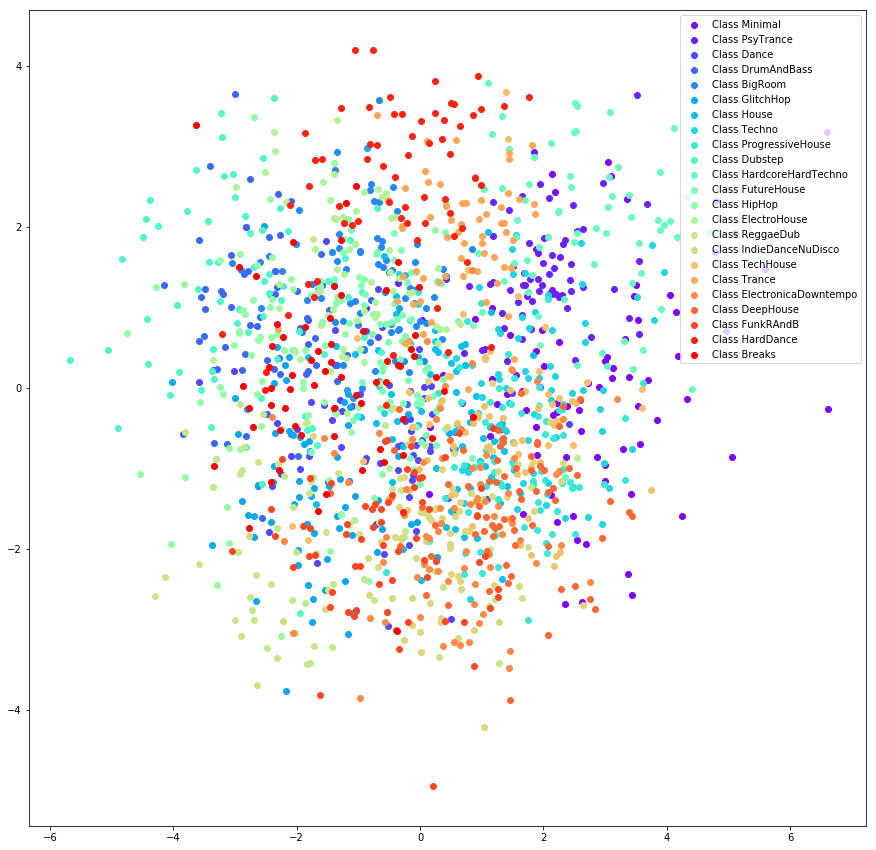

In [153]:
plt.figure(figsize=(15,15))
plotLDA(X, label)
plt.legend(loc = 1)

### PCA with 71 dimensions

['Minimal', 'PsyTrance', 'Dance', 'DrumAndBass', 'BigRoom', 'GlitchHop', 'House', 'Techno', 'ProgressiveHouse', 'Dubstep', 'HardcoreHardTechno', 'FutureHouse', 'HipHop', 'ElectroHouse', 'ReggaeDub', 'IndieDanceNuDisco', 'TechHouse', 'Trance', 'ElectronicaDowntempo', 'DeepHouse', 'FunkRAndB', 'HardDance', 'Breaks']


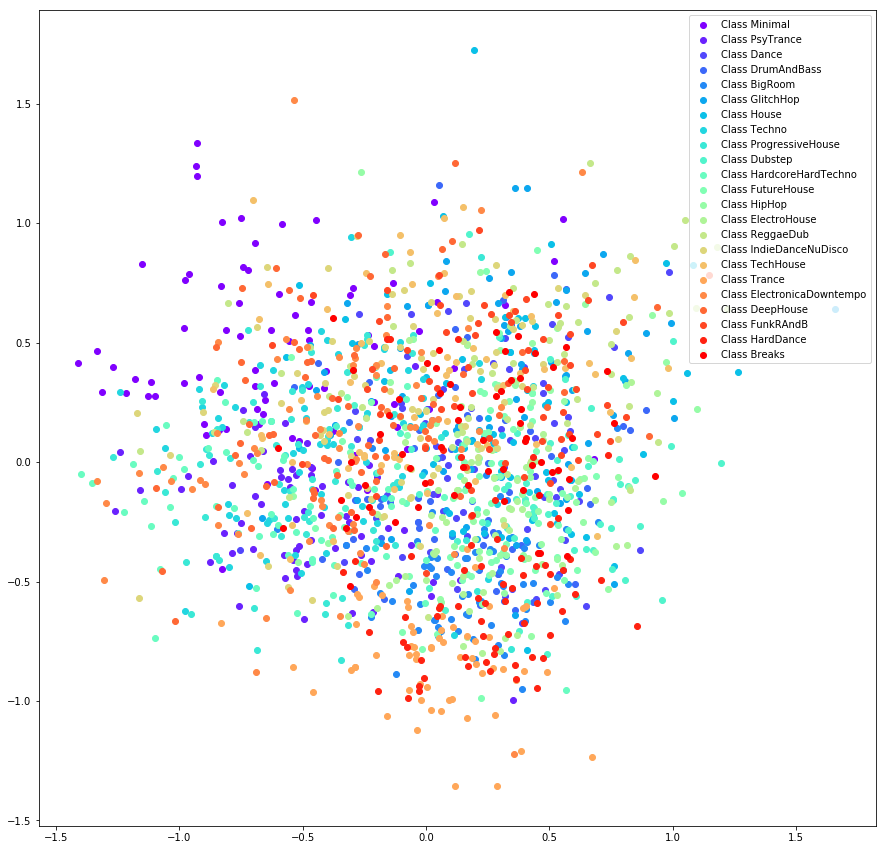

In [154]:
plt.figure(figsize=(15,15))
X_norm = (X - X.min())/(X.max()-X.min())
plotPCA(X_norm, label)
plt.legend(loc = 1)

### It's so messy! Let's only select part of features 

In [155]:
dataColRanges = ('1-ZCRm', '34-ChromaDeviationm')
labelCol = 'class'
start = dataColRanges[0]
end = dataColRanges[1]
new_X = data_raw.loc[:, start: end]
new_label = data_raw.loc[:, labelCol]
print(len(new_X.columns))

34


After manaully tweaking the pca, I've decided there're just way too many classes, not really intuitive to human  
But I keep a dataset with only half portion of original features to play around in the training process

# 2. Classifiers

## SVM

In [158]:
from sklearn import svm

In [159]:
def tweakLSVM(new_X, new_label, loss = 'squared_hinge', dual=True, C=1.0):
    lin_clf = svm.LinearSVC(loss=loss, dual=dual, C=C)
    lin_clf.fit(new_X, new_label)
    ac = accu(lin_clf, new_X, new_label)
#     print(ac)
    return ac
    
def accu(lin_clf, new_X, new_label):
    result = [lin_clf.predict(np.array(new_X.loc[i,:]).reshape(1,-1))[0] is new_label.loc[i] for i in range(len(new_X))] 
    ratio = sum(result)/len(result)
    return ratio

In [172]:
tweakLSVM(X, label, C = 4)

0.23167701863354037

In [169]:
clf = svm.SVC(C = 4, degree = 5, decision_function_shape='ovo')
clf.fit(X, label)
accu(clf,X, label)

0.5149068322981366

Really poor performance!
### Let's PCA it first

In [162]:
def testPCA(X, label):
    acc = []
    for i in range(5, 70, 2):
        pca = sklearnPCA(n_components=26)
        pca_transformed = pd.DataFrame(pca.fit_transform(X))
        acc.append(tweakLSVM(pca_transformed, label, C=1))
    return acc, list(range(3,70))

In [163]:
# acc, i = testPCA(X, label)

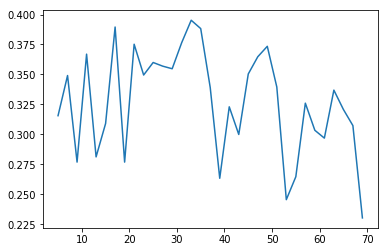

In [164]:
plt.plot(list(range(5, 70, 2)), acc)

a little experiment on how to chose the best component number of PCA

This gives us a upper bound of 40% percent, it's SOME progress

## Nearest neighbors

In [165]:
from sklearn import neighbors

clf = neighbors.KNeighborsClassifier(71, weights="distance")
clf.fit(X, label)
accu(clf, X, label)

1.0

In [166]:
accu(clf,X_v, label_v)

0.4217391304347826

Great training performance,  
REALLY BAD generalization ability

## Fully connected neural networks for this task

Result of pre-trained model.  
The best performance model trained on my machine is 80% accuracy

In [87]:
from featureExtract.feature import calFeature
from classifier.model import MusicClassifier

# calculate params
feats, names = calFeature('../../data/demo_chunks/bigRoom.wav')

# load model
model = MusicClassifier("../../data/model/dnn_3.h5")
model.getDataInfo("../../data/data_set/beatsdataset.csv")

# predict
output = model.predict(feats)

wav file infomation:
length of wav file: 4089344
sampling frequency is: 22050
Length of input signal is 4089344
Sampling frequency is 22050
Huh, this song sounds like BigRoom


### Training miscellany

#### Train and apply the classifier

In [25]:
from keras.models import Sequential
from keras.layers import Dense

In [26]:
Dnn_1 = Sequential()
# input layer
Dnn_1.add(Dense(100, activation='relu', input_dim = 71))
# hidden layer
Dnn_1.add(Dense(100, activation='relu'))
Dnn_1.add(Dense(100, activation='relu'))
Dnn_1.add(Dense(200, activation='relu'))
# Dnn_1.add(Dense(200, activation='relu'))
# Dnn_1.add(Dense(200, activation='relu'))
# Dnn_1.add(Dense(200, activation='relu'))
# Dnn_1.add(Dense(200, activation='relu'))
# Dnn_1.add(Dense(200, activation='relu'))
Dnn_1.add(Dense(100, activation='relu'))
Dnn_1.add(Dense(23, activation = 'relu'))

#output layer
Dnn_1.add(Dense(23, activation = 'softmax'))

In [27]:
Dnn_1.compile(metrics=['accuracy'], optimizer='Adam', loss='mean_squared_error')

In [57]:
Dnn_1.fit(X_, label_, validation_split = 0.0, epochs = 300, batch_size=50, shuffle = False)

Epoch 1/300
2300/2300 [==============================] - 0s 204us/step - loss: 0.0283 - acc: 0.4996
Epoch 2/300
2300/2300 [==============================] - 0s 195us/step - loss: 0.0276 - acc: 0.5230
Epoch 3/300
2300/2300 [==============================] - 0s 196us/step - loss: 0.0268 - acc: 0.5326
Epoch 4/300
2300/2300 [==============================] - 0s 195us/step - loss: 0.0275 - acc: 0.5157
Epoch 5/300
2300/2300 [==============================] - 0s 195us/step - loss: 0.0269 - acc: 0.5222
Epoch 6/300
2300/2300 [==============================] - 0s 195us/step - loss: 0.0277 - acc: 0.5052
Epoch 7/300
2300/2300 [==============================] - 0s 195us/step - loss: 0.0282 - acc: 0.4891
Epoch 8/300
2300/2300 [==============================] - 0s 196us/step - loss: 0.0263 - acc: 0.5413
Epoch 9/300
2300/2300 [==============================] - 0s 195us/step - loss: 0.0259 - acc: 0.5522
Epoch 10/300
2300/2300 [==============================] - 0s 195us/step - loss: 0.0251 - acc: 0.5739

2300/2300 [==============================] - 0s 211us/step - loss: 0.0230 - acc: 0.5974
Epoch 163/300
2300/2300 [==============================] - 0s 213us/step - loss: 0.0228 - acc: 0.6017
Epoch 164/300
2300/2300 [==============================] - 0s 209us/step - loss: 0.0216 - acc: 0.6257
Epoch 165/300
2300/2300 [==============================] - 0s 213us/step - loss: 0.0222 - acc: 0.6083
Epoch 166/300
2300/2300 [==============================] - 0s 209us/step - loss: 0.0223 - acc: 0.6091
Epoch 167/300
2300/2300 [==============================] - 0s 212us/step - loss: 0.0222 - acc: 0.6117
Epoch 168/300
2300/2300 [==============================] - 0s 211us/step - loss: 0.0227 - acc: 0.6096
Epoch 169/300
2300/2300 [==============================] - 0s 213us/step - loss: 0.0213 - acc: 0.6326
Epoch 170/300
2300/2300 [==============================] - 0s 211us/step - loss: 0.0229 - acc: 0.5991
Epoch 171/300
2300/2300 [==============================] - 0s 208us/step - loss: 0.0219 - acc: 0

#### Evaluate the result

In [58]:
Dnn_1.evaluate(X_, label_)

2300/2300 [==============================] - 0s 137us/step


[0.02430559956509134, 0.5882608698761982]

In [54]:
mapping, n = generateMapping(label)
print(mapping)
print(n)

{'IndieDanceNuDisco': 15, 'HardcoreHardTechno': 11, 'Minimal': 16, 'DrumAndBass': 4, 'TechHouse': 20, 'FutureHouse': 9, 'ElectronicaDowntempo': 7, 'House': 14, 'ProgressiveHouse': 17, 'FunkRAndB': 8, 'Trance': 22, 'Dance': 2, 'ReggaeDub': 19, 'ElectroHouse': 6, 'HipHop': 13, 'Breaks': 1, 'PsyTrance': 18, 'Dubstep': 5, 'HardDance': 12, 'GlitchHop': 10, 'BigRoom': 0, 'Techno': 21, 'DeepHouse': 3}
23


In [40]:
# def examLabel(idx):
#     print("right label one-hot-key is:")
#     print(label_[idx])
#     right_label = getLabelStr(label_[idx])
#     print("right edm type is: " + right_label)
    
# for i in range(10,50):
#     examLabel(i)

In [30]:
# for i in range(230):
#     inDim = X_.shape[1]
#     predict = Dnn_1.predict(X_[10*i:10*(i+1)].reshape(10, inDim), batch_size = 10)
# #     print(X_[10*i:10*(i+1)].reshape(10, inDim))
#     print(predict)

In [31]:
# def binarySoftmax(pred_label):
#     """
#     Input:
#         prediction np array
#     """
#     idx = np.argmax(pred_label)
    
    
# count = 0
# for i in range(2300):
#     inDim = X_.shape[1]
#     predict = Dnn_1.predict(X_[i].reshape(1, inDim), batch_size = 1)
#     pred_str = getLabelStr([predict])
#     rig_str = getLabelStr([label_[i]])
    
#     if(pred_str[0] == rig_str[0]):
#         count += 1
# #     print("right edm type is:\t" + rig_str[0])
# #     print("prediction type is:\t" + pred_str[0])
# #     print('\n')
    
# accuracy = count/2300
# print("the accuracy is: %.4f%%" % (accuracy * 100))

In [60]:
Dnn_1.save('./dnn_1.h5')